# Final Capstone Project — The Battle of Neighbourhoods

### Background 
<p> India is the second most populated country in the world with nearly a fifth of the world's population. India is one of biggest country in the world with total geo-graphical area of 3,287,240 sq.km. The country has very diverse culture which changes across the geogrphical areas. 
    <p> Quality and variety of food being served in the Indian restaurants is my area of interest. Many people travel across the country for various reasons like tourism, jobs, business, family etc. After visiting a new place foody people always want to taste the best cuisines of every part of the city which lies in their budget. Analysing best restaurants of different cities is goal of this project. 
    <p>Zomato is an Indian multinational restaurant aggregator and food delivery company founded by Pankaj Chaddah and Deepinder Goyal in 2008. Zomato provides information, menus and user-reviews of restaurants as well as food delivery options from partner restaurants in many cities. As of 2019, the service is available in 24 countries and in more than 10,000 cities. [Source : Wikipedia]
    <p>Zomato restaurant data across various cities from the globe is available on Kaggle. 

 #### Questions to be answered 
- Find cumulative number of restaurants in each City of India. 
- Focus on the City having maximum Restaurants (in this case it is New Delhi)
- Show restaurant cluters from Delhi using folium maps. Use k-means for clustering.
- Find out 5 places from New Delhi which have best restaurant.
- Find out New Delhi's 5 worst places for eating
- Find out top 5 localities of New Delhi having maximum and minimum number of Restaurants
- Find best places for chinese restaurant in New Delhi city
- Group and summerize the data based on localities in New Delhi

### Dataset Description 
For this project we are going to use following datasets :
<ul>
<li> Zomato kaggle dataset that contains list of Indian cities, Localities, Resturant names, Ratings.
    <ul>
        <li>Data source : <a href="https://www.kaggle.com/shrutimehta/zomato-restaurants-data">Zomato kaggel dataset</a>
 <li> Description : This data set contains the required information. And we will use this data set to explore various cities of India.
     </ul>
<li> Foursquare Places API.
        <ul>
            <li>Data source : <a href="https://developer.foursquare.com/"> Fousquare API </a>
        <li> Description : The Foursquare Places API provides location based experiences with diverse information about venues, users, photos, and check-ins. The API supports real time access to places, Snap-to-Place that assigns users to specific locations, and Geo-tag.
    

### Methodology 
- Collect the Indian restaurant's data from <a href="https://www.kaggle.com/shrutimehta/zomato-restaurants-data">Zomato kaggel dataset</a>
- Perform data pre-processing to remove unnecessary fields from the dataset 
- Use FourSquare API to find all venues for each city.
- Answer Questions of interest using data analytics appraoch. 
- Visualize the results using different libraries in Python

<h4> Install required packages 

In [15]:
!conda install -c conda-forge folium=0.5.0 --yes
! pip install geocoder

Solving environment: ...working... done

# All requested packages already installed.



<h4>Import required libraries 

In [1]:
import pandas as pd
import numpy as np
import requests 
from pandas.io.json import json_normalize 
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
import folium 
import geocoder

<h4> Read the Zomato resturant data from downloaded csv file

In [2]:
df = pd.read_csv('kzomato.csv',encoding='ISO-8859-1')
df.shape

(9551, 21)

In [3]:
df.head()

Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  ...          Currency Has Table booking  \
0        French, Japanese, Desserts  ...  Botswana Pula(P)               Yes   
1                          Japanese  ...  Botswana Pula(P)               Yes   
2  Seafood, Asian, Filipino, Indian  ...  Botswana Pula(P)               Yes   
3                   Japanese, Sushi  ...  Botswana Pula(P)                No   
4                  Japanese, Korean  ...  Botswana Pula(P)               Yes   

  Has Online delivery Is delivering now Switch to order menu Price range  \
0                  No                No                   No           3   
1                  No                No                   No           3   
2                  No                No                   No           4   
3                  No                No                   No           4   
4                  No                No                   No           4   

   Aggregate rating  Rating color Rating text Votes  
0               4.8    Dark Green   Excellent   314  
1               4.5    Dark Green   Excellent   591  
2               4.4         Green   Very Good   270  
3               4.9    Dark Green   Excellent   365  
4               4.8    Dark Green   Excellent   229  

[5 rows x 21 columns]

In [4]:
# Focus on data related with Indian Restaurants 
df_india = df[df['Country Code'] == 1]
df_india.reset_index(drop=True, inplace=True)
df_india.columns
df_india.shape

(8652, 21)

<h4> Data Cleaning - Remove the unwanted columns and rows from dataset

In [7]:
df_Res= df_india[df_india.Longitude !=0.000000][['Restaurant Name','City', 'Locality','Longitude','Latitude','Cuisines','Aggregate rating','Rating text','Votes']]
df_Res.shape

(8156, 9)

In [8]:
#Remove Restaurants having aggregate rating 0.0 
df_Res = df_Res[df_Res['Aggregate rating'] !=0.0]
df_Res.shape

(6301, 9)

In [9]:
df_Res.head()

Restaurant Name  City             Locality  \
0                             Jahanpanah  Agra           Agra Cantt   
2                Time2Eat - Mama Chicken  Agra           Agra Cantt   
3  Chokho Jeeman Marwari Jain Bhojanalya  Agra          Civil Lines   
4                         Pinch Of Spice  Agra          Civil Lines   
6                  Peshawri - ITC Mughal  Agra  ITC Mughal, Tajganj   

   Longitude   Latitude                        Cuisines  Aggregate rating  \
0  78.011544  27.161661           North Indian, Mughlai               3.9   
2  78.011608  27.160832                    North Indian               3.6   
3  77.998092  27.195928                      Rajasthani               4.0   
4  78.007553  27.201725  North Indian, Chinese, Mughlai               4.2   
6  78.044095  27.160934           North Indian, Mughlai               4.3   

  Rating text  Votes  
0        Good    140  
2        Good     94  
3   Very Good     87  
4   Very Good    177  
6   Very Good    133

In [10]:
#Display cumulative number of restaurants in each City 
df_Res.value_counts('City')

City
New Delhi       3975
Gurgaon          874
Noida            676
Faridabad        147
Ghaziabad         23
Ahmedabad         21
Coimbatore        20
Chennai           20
Indore            20
Jaipur            20
Kolkata           20
Bangalore         20
Kochi             20
Mumbai            20
Surat             20
Pune              20
Puducherry        20
Mysore            19
Nagpur            19
Chandigarh        18
Ludhiana          18
Hyderabad         18
Kanpur            18
Lucknow           17
Patna             17
Bhubaneshwar      17
Amritsar          17
Goa               17
Ranchi            16
Aurangabad        16
Allahabad         15
Vizag             15
Guwahati          15
Bhopal            14
Nashik            14
Agra              14
Dehradun          13
Varanasi          13
Mangalore         11
Vadodara          10
Secunderabad       2
Mohali             1
Panchkula          1
dtype: int64

<h4> Since Restaurants from Delhi are maximum, we will focus on Delhi city only. The methodology can be applied on all other cities

In [11]:
df_delhi = df_Res[df_india['City'] == 'New Delhi']
df_delhi.reset_index(drop=True, inplace=True)
df_Res = df_delhi
df_Res.shape

<ipython-input-11-5c3187724cce>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_delhi = df_Res[df_india['City'] == 'New Delhi']


(3975, 9)

<h4>Show restaurant cluters from Delhi using folium maps. Use k-means for clustering.

In [12]:
New_Delhi_Rest = folium.Map(location=[28.61, 77.20], zoom_start=9)

X = df_Res['Latitude']
Y = df_Res['Longitude']
Z = np.stack((X, Y), axis=1)

kmeans = KMeans(n_clusters=7, random_state=0).fit(Z)

clusters = kmeans.labels_
colors = ['red', 'green', 'blue', 'yellow','orange','white','brown']
df_Res ['Cluster'] = clusters

for latitude, longitude, Locality, cluster in zip(df_Res['Latitude'], df_Res['Longitude'], df_Res['Locality'], df_Res['Cluster']):
    label = folium.Popup(Locality, parse_html=True)
    folium.CircleMarker(
        [latitude, longitude],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(New_Delhi_Rest)  

New_Delhi_Rest

In [12]:
df_Res.head()

Restaurant Name       City Locality  Longitude   Latitude  \
0        Burger.in  New Delhi  Adchini  77.196923  28.535382   
1  Days of the Raj  New Delhi  Adchini  77.197475  28.535493   
2   Dilli Ka Dhaba  New Delhi  Adchini  77.198033  28.537547   
3        Govardhan  New Delhi  Adchini  77.196924  28.535523   
4   Mezbaan Grills  New Delhi  Adchini  77.198122  28.538134   

                              Cuisines  Aggregate rating Rating text  Votes  \
0                            Fast Food               3.2     Average     46   
1   North Indian, Seafood, Continental               3.4     Average     45   
2           South Indian, North Indian               2.6     Average     11   
3  South Indian, North Indian, Chinese               3.4     Average    238   
4                              Mughlai               3.1     Average      8   

   Cluster  
0        2  
1        2  
2        2  
3        2  
4        2

<h4> Lets find out 5 places from New Delhi which have best restaurant. We will use Aggregate Rating of Restaurants for this purpose.

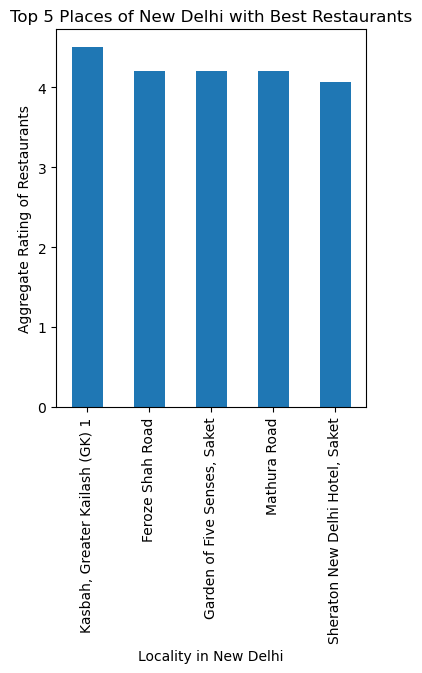

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4,5), dpi = 100)
plt.title('Top 5 Places of New Delhi with Best Restaurants')
df_Res.groupby('Locality')['Aggregate rating'].mean().nlargest(5).plot(kind='bar')
plt.xlabel('Locality in New Delhi')
plt.ylabel('Aggregate Rating of Restaurants')
plt.show()

<h4>New Delhi's top places foody people should visit are Kasbah, Feroze Shah Road, Saket, and Mathura Road

<h4> Lets find out New Delhi's 5 worst places for eating 

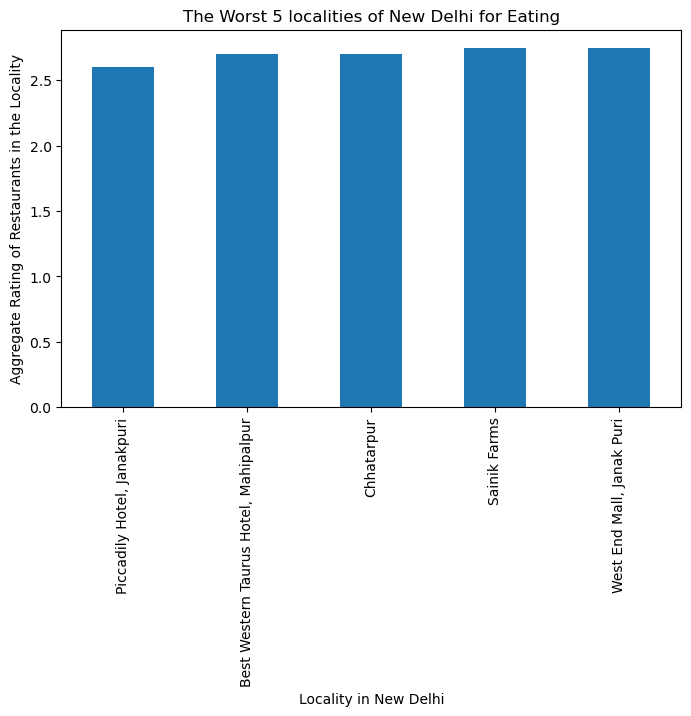

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5), dpi = 100)
plt.title('The Worst 5 localities of New Delhi for Eating')
df_Res.groupby('Locality')['Aggregate rating'].mean().nsmallest(5).plot(kind='bar')
plt.xlabel('Locality in New Delhi')
plt.ylabel('Aggregate Rating of Restaurants in the Locality')
plt.show()

<h4> Lets find out top 5 localities of New Delhi having maximum number of Restaurants

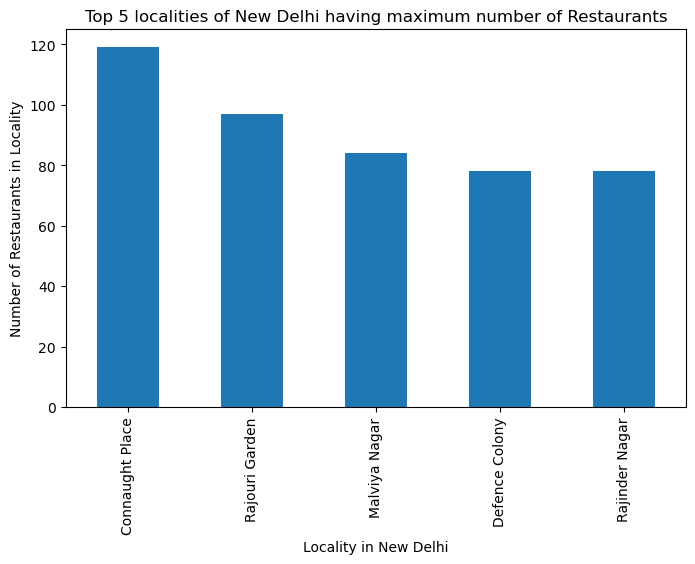

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5), dpi = 100)
plt.title('Top 5 localities of New Delhi having maximum number of Restaurants')
df_Res.groupby('Locality')['Restaurant Name'].count().nlargest(5).plot(kind='bar')
plt.xlabel('Locality in New Delhi')
plt.ylabel('Number of Restaurants in Locality')
plt.show()

<h4>The best places for edible person to stay in New Delhi is <b>Connaught Place</b>

<h4> Lets find out 5 localities of New Delhi having minimum number of Restaurants

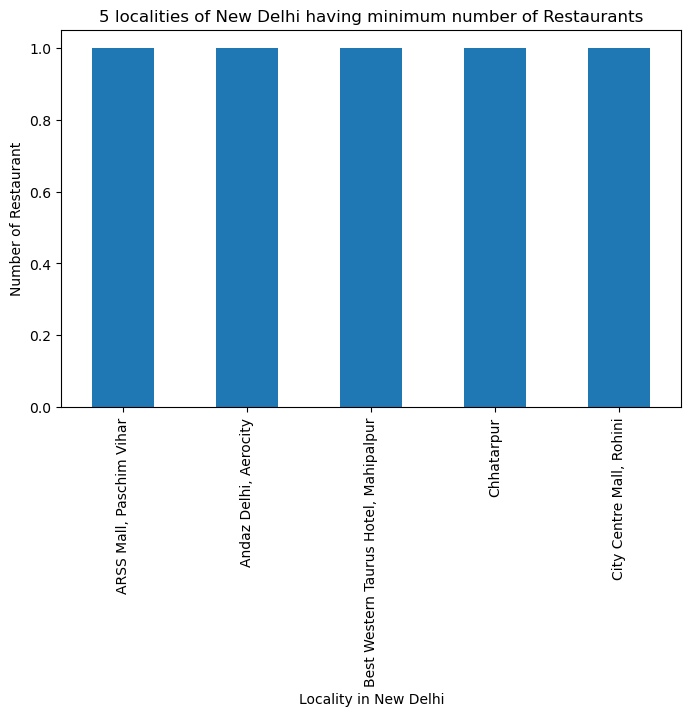

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5), dpi = 100)
plt.title('5 localities of New Delhi having minimum number of Restaurants')
df_Res.groupby('Locality')['Restaurant Name'].count().nsmallest(5).plot(kind='bar')
plt.xlabel('Locality in New Delhi')
plt.ylabel('Number of Restaurant')
plt.show()

## What are the best places for chinese restaurant in New Delhi city

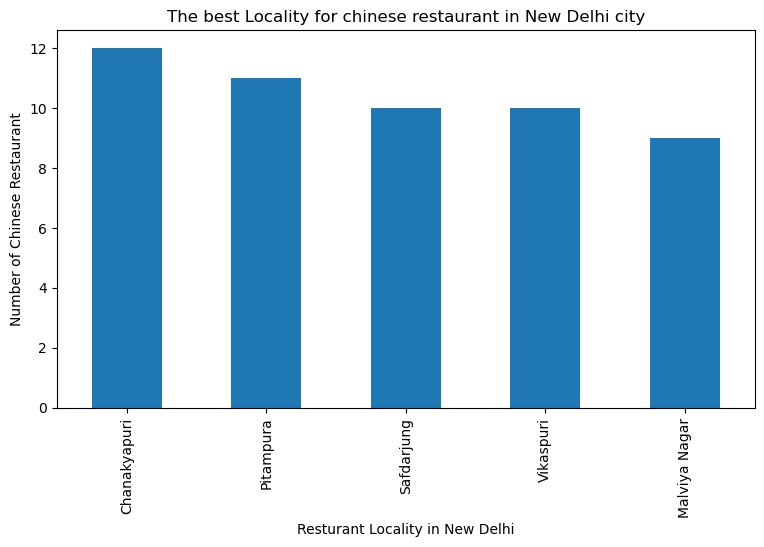

In [52]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
plt.title('The best Locality for chinese restaurant in New Delhi city')
df_Res[df_Res['Cuisines'].str.startswith('Chinese')].groupby('Locality')['Restaurant Name'].count().nlargest(5).plot(kind='bar')
plt.xlabel('Resturant Locality in New Delhi')
plt.ylabel('Number of Chinese Restaurant')
plt.show()

<b>Chanakyapuri</b> is the best place for Chinese restaurant.

<h4> Top 5 New Delhi Places for Chinies Cushion 

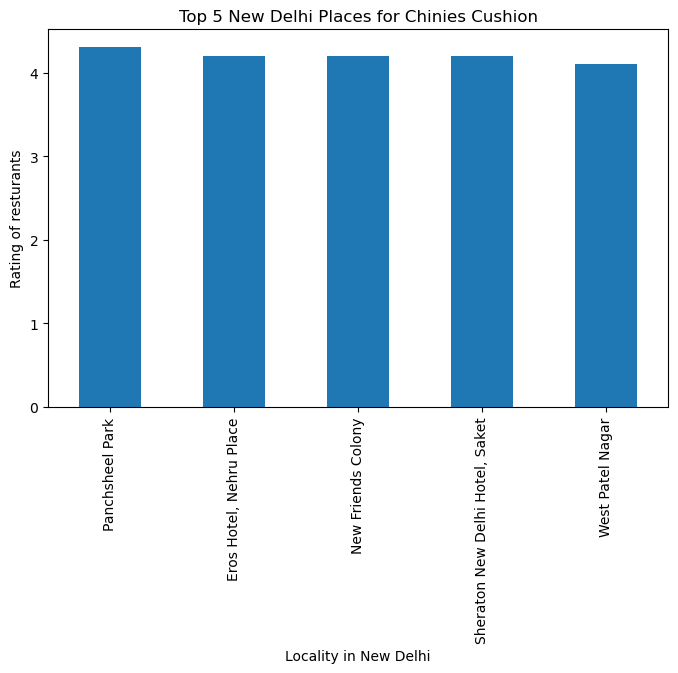

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5), dpi = 100)
plt.title('Top 5 New Delhi Places for Chinies Cushion')
df_Res[df_Res['Cuisines'].str.startswith('Chinese')].groupby('Locality')['Aggregate rating'].mean().nlargest(5).plot(kind='bar')
plt.xlabel('Locality in New Delhi')
plt.ylabel('Rating of resturants')
plt.show()

<b> Panchsheel park</b> is best Chinese resturants.

<h4> Grouping of the data based on locality 

In [20]:
df_Res_Loc =  df_Res.groupby('Locality').count()['Restaurant Name'].to_frame()
df_Res_Loc.head()

Restaurant Name
Locality                                      
ARSS Mall, Paschim Vihar                     1
Adchini                                     13
Aditya Mega Mall, Karkardooma                4
Aerocity                                     2
Aggarwal City Mall, Pitampura                3

In [26]:
df_Res_Loc =  df_Res.groupby('Locality').count()['Restaurant Name'].to_frame()
df_Res_rating= df_Res.groupby('Locality')['Aggregate rating'].mean().to_frame()
d_Cuisines = df_Res.groupby(['Locality'])['Cuisines'].agg(', '.join).reset_index()
d_R = df_Res.groupby(['Locality'])['Rating text'].unique().agg(', '.join).reset_index()
d_V = df_Res.groupby(['Locality'])['Votes'].sum().to_frame()
d_Lat = df_Res.groupby('Locality').mean()['Latitude'].to_frame()
d_Lng = df_Res.groupby('Locality').mean()['Longitude'].to_frame()
df_final = pd.merge(d_Lat,d_Lng,on='Locality').merge(df_Res_Loc, on='Locality').merge(d_Cuisines, on='Locality').merge(df_Res_rating,on ='Locality').merge(d_R, on ='Locality').merge(d_V, on ='Locality')

In [27]:
df_final = df_final[df_final['Aggregate rating'] != 0.000000]
df_final.columns =['Locality','Lat','Lng', 'No_of_Restaurant','Cusines', 'Agg_Rating','Comments' ,'No_of_Votes']
df_final.head()

Locality        Lat        Lng  No_of_Restaurant  \
0       ARSS Mall, Paschim Vihar  28.668945  77.101544                 1   
1                        Adchini  28.537063  77.197808                13   
2  Aditya Mega Mall, Karkardooma  28.656131  77.301266                 4   
3                       Aerocity  28.553077  77.104270                 2   
4  Aggarwal City Mall, Pitampura  28.690020  77.134650                 3   

                                             Cusines  Agg_Rating  \
0  North Indian, South Indian, Chinese, Mithai, F...    3.100000   
1  Fast Food, North Indian, Seafood, Continental,...    3.292308   
2  Finger Food, North Indian, Mughlai, Pizza, Fas...    3.275000   
3  Fast Food, Italian, Pizza, North Indian, Conti...    3.200000   
4  North Indian, Chinese, Street Food, Mithai, No...    3.033333   

                         Comments  No_of_Votes  
0                         Average          117  
1  Average, Good, Poor, Very Good         1560  
2                   Average, Good          434  
3                         Average           59  
4                         Average          126

In [28]:
df_final.shape

(240, 8)

<h4> Lets Use FourSquare Credentials 

In [30]:
CLIENT_ID = 'CPWAQLCCET2F2HEZGB33LZ2HXIAJOVWW4TBPW1NI4RJ4OGUH' 
CLIENT_SECRET = '2L130XJ1PEU5UL3YQK5UUNCXYEALUVL0S2XPQYVDJYJCPTO1' 
VERSION = '20180605' 
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: CPWAQLCCET2F2HEZGB33LZ2HXIAJOVWW4TBPW1NI4RJ4OGUH
CLIENT_SECRET:2L130XJ1PEU5UL3YQK5UUNCXYEALUVL0S2XPQYVDJYJCPTO1


<h4> Define a function to process a Locality in New Delhi

In [31]:
def getNearbyVenues(names, latitudes, longitudes, radius=500,LIMIT = 100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Locality', 
                  'Locality Latitude', 
                  'Locality Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

<h4> Lets process all locations in New Delhi

In [32]:
# find the venues in all New Delhi Locality
new_Delhi_venues = getNearbyVenues(names=df_final['Locality'],
                                   latitudes=df_final['Lat'],
                                   longitudes=df_final['Lng']
                                  )

ARSS Mall, Paschim Vihar
Adchini
Aditya Mega Mall, Karkardooma
Aerocity
Aggarwal City Mall, Pitampura
Aggarwal City Plaza, Rohini
Alaknanda
Ambience Mall, Vasant Kunj
Anand Lok
Anand Vihar
Andaz Delhi, Aerocity
Ansal Plaza Mall, Khel Gaon Marg
Asaf Ali Road
Ashok Vihar Phase 1
Ashok Vihar Phase 2
Ashok Vihar Phase 3
Barakhamba Road
Basant Lok Market, Vasant Vihar
Bellagio, Ashok Vihar Phase 2
Best Western Taurus Hotel, Mahipalpur
Bhikaji Cama Place
Chanakyapuri
Chander Nagar
Chandni Chowk
Chawri Bazar
Chhatarpur
Chittaranjan Park
City Centre Mall, Rohini
City Square Mall, Rajouri Garden
Civil Lines
Community Centre, New Friends Colony
Connaught Place
Crescent Square Mall, Rohini
Cross River Mall, Karkardooma
Crowne Plaza Hotel, Rohini
Crowne Plaza, Mayur Vihar Phase 1
D Mall, Netaji Subhash Place
DDA Market, Kalu Sarai, Hauz Khas
DLF City Centre Mall, Shalimar Bagh
DLF Emporio Mall, Vasant Kunj
DLF Place Mall, Saket
DLF Promenade Mall, Vasant Kunj
DLF South Square, Sarojini Nagar
Darya

In [33]:
new_Delhi_venues.head()

Locality  Locality Latitude  Locality Longitude  \
0  ARSS Mall, Paschim Vihar          28.668945           77.101544   
1  ARSS Mall, Paschim Vihar          28.668945           77.101544   
2  ARSS Mall, Paschim Vihar          28.668945           77.101544   
3  ARSS Mall, Paschim Vihar          28.668945           77.101544   
4  ARSS Mall, Paschim Vihar          28.668945           77.101544   

                         Venue  Venue Latitude  Venue Longitude  \
0                       Subway       28.669999        77.102546   
1                    Pizza Hut       28.670321        77.103853   
2              Café Coffee Day       28.670009        77.102480   
3  Baljeet's Amritsari Koolcha       28.665768        77.100481   
4                  Little Chef       28.670000        77.101459   

       Venue Category  
0      Sandwich Place  
1         Pizza Place  
2         Coffee Shop  
3   Indian Restaurant  
4  Chinese Restaurant

In [34]:
new_Delhi_venues.groupby('Locality').count()

Locality Latitude  Locality Longitude  Venue  \
Locality                                                                       
ARSS Mall, Paschim Vihar                        9                   9      9   
Adchini                                         5                   5      5   
Aditya Mega Mall, Karkardooma                  10                  10     10   
Aerocity                                        7                   7      7   
Aggarwal City Mall, Pitampura                   4                   4      4   
...                                           ...                 ...    ...   
West Gate Mall, Rajouri Garden                 14                  14     14   
West Patel Nagar                                4                   4      4   
Worldmark 1, Aerocity                          25                  25     25   
Yusuf Sarai                                    10                  10     10   
ibis New Delhi, Aerocity                       26                  26     26   

                                Venue Latitude  Venue Longitude  \
Locality                                                          
ARSS Mall, Paschim Vihar                     9                9   
Adchini                                      5                5   
Aditya Mega Mall, Karkardooma               10               10   
Aerocity                                     7                7   
Aggarwal City Mall, Pitampura                4                4   
...                                        ...              ...   
West Gate Mall, Rajouri Garden              14               14   
West Patel Nagar                             4                4   
Worldmark 1, Aerocity                       25               25   
Yusuf Sarai                                 10               10   
ibis New Delhi, Aerocity                    26               26   

                                Venue Category  
Locality                                        
ARSS Mall, Paschim Vihar                     9  
Adchini                                      5  
Aditya Mega Mall, Karkardooma               10  
Aerocity                                     7  
Aggarwal City Mall, Pitampura                4  
...                                        ...  
West Gate Mall, Rajouri Garden              14  
West Patel Nagar                             4  
Worldmark 1, Aerocity                       25  
Yusuf Sarai                                 10  
ibis New Delhi, Aerocity                    26  

[237 rows x 6 columns]

<h4> Above table shows summerized information of each locality 